In [166]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random
import cv2
import requests
from PIL import Image
 

In [71]:
#download dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [72]:
#reshape
X_train_DNN = X_train.reshape(X_train.shape[0],784)
X_test_DNN = X_test.reshape(X_test.shape[0],784)
print(X_train.shape)

(60000, 28, 28)


In [73]:
#one hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [74]:
#normazlizing
X_train_DNN = X_train_DNN/255
X_test_DNN = X_test_DNN/255 

# MNIST Without CNN 

In [76]:
#Without CNN modedl Build
#28 * 28 = 784
#The dense layers can be played with 
#1) Adding more layers 
#2)Adding_subtracting Neurons of layers to get better aacuracy
model = Sequential()
model.add(Dense(20 , input_dim = 784, activation = 'relu'))
model.add(Dense(20,activation = 'relu'))
model.add(Dense(20,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(Adam(lr = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
#Without CNN modedl training
his = model.fit(X_train_DNN,y_train,verbose = 0,validation_split = 0.1,epochs = 12, batch_size = 50)

<class 'list'>
Test score: 2.3176039268493653
Test accuracy: 0.0933


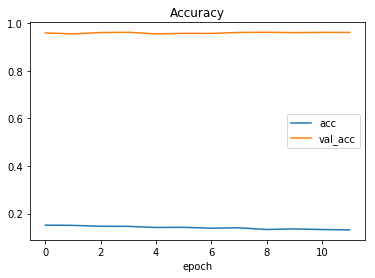

In [77]:
#plot training and validation to visualize model behaviour
plt.plot(his.history['loss'])
plt.plot(his.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test_DNN, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

# MNIST With CNN

In [78]:
#reshape
X_train_CNN = X_train.reshape(60000,28,28,1)
X_test_CNN = X_test.reshape(10000,28,28,1)
print(X_train.shape)

(60000, 28, 28)


In [80]:
#normazlizing
X_train_CNN = X_train_CNN/255
X_test_CNN = X_test_CNN/255 

In [79]:
#With CNN modedl Build
#28 * 28 = 784
#The dense and CNN layers can be played with 
#1) Adding more layers 
#2)Adding_subtracting Neurons of layers to get better aacuracy
model1 = Sequential()
model1.add(Conv2D(30,(5,5),input_shape=(28,28,1), activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(15,(3,3), activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(500,activation = 'relu'))
model1.add(Dense(10,activation = 'softmax'))
model1.compile(Adam(lr = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               188000    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
Total para

In [84]:
#With CNN modedl1 training
his1 = model1.fit(X_train_CNN,y_train,epochs = 12,validation_split = 0.1,batch_size = 400,verbose = 0,shuffle = 1)

<class 'list'>
Test score: 2.3176039268493653
Test accuracy: 0.0933


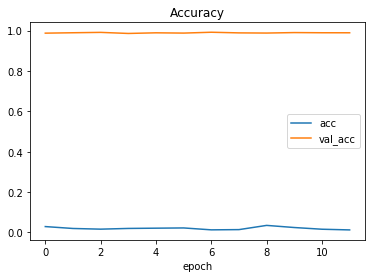

In [83]:
plt.plot(his1.history['loss'])
plt.plot(his1.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test_DNN, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

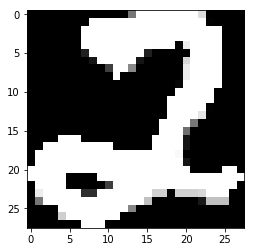

In [180]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [181]:
img_DNN = img/255
img_DNN = img_DNN.reshape(1, 784)
 
prediction = model.predict_classes(img_DNN)
print("predicted digit:", str(prediction))

predicted digit: [1]


In [182]:
img_CNN = img/255
img_CNN = img_CNN.reshape(1,28,28,1)
#plt.imshow(img_CNN, cmap=plt.get_cmap('gray'))
 
prediction = model1.predict_classes(img_CNN)
print("predicted digit:", str(prediction))

predicted digit: [2]
